In [1]:
import numpy as np
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.options.mode.chained_assignment = None
import time, os, re, selenium
import glob, bs4, requests, codecs
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.svm import SVR, SVC
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV, cross_val_score 
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_log_error, mean_squared_error, make_scorer
from sklearn.model_selection import StratifiedShuffleSplit, validation_curve
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from scipy import stats
from datetime import datetime
from selenium import webdriver
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.inspection import permutation_importance
from urllib.request import urlopen as uopen
from bs4 import BeautifulSoup as soup
from urllib import request
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import chi2_contingency, ttest_ind
import seaborn as sns

In [3]:
data = pd.read_csv(r'C:\Users\David\Documents\Portfolio_Projects\Life-Expectancy-and-GDP-Starter\Life-Expectancy-and-GDP-Starter\all_data.csv')
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [6]:
data.columns

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')

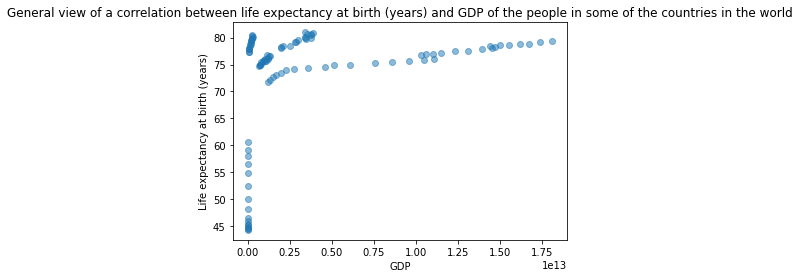

In [10]:
plt.scatter(data['GDP'], data['Life expectancy at birth (years)'], alpha=0.5)
plt.xlabel('GDP')
plt.ylabel('Life expectancy at birth (years)')
plt.title('General view of a correlation between life expectancy at birth (years) and GDP of the people in some of the countries in the world')
plt.show()

In [9]:
data.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [11]:
data.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

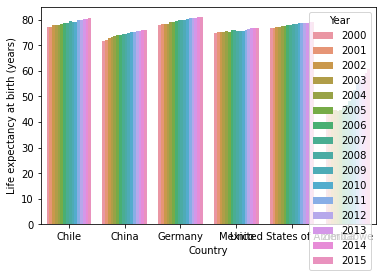

In [14]:
ax = sns.barplot(x = "Country", y = "Life expectancy at birth (years)", hue = "Year", data = data)
ax.set(xlabel="Country", ylabel = "Life expectancy at birth (years)")
plt.show()
# We see that the bar chart is not so visually depictive manner to represent the data, but we still get a general overview that over time life expectancy increases in all of the countries

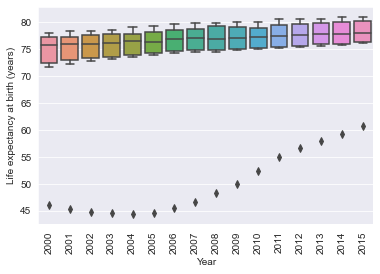

In [27]:
ax1 = sns.boxplot(data=data, x="Year", y="Life expectancy at birth (years)")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.show()
# the boxplot gives us a better overview that over the years the life expectancy increases

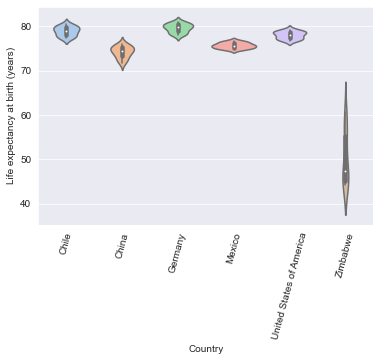

In [28]:
ax2 = sns.violinplot(data=data, x="Country", y="Life expectancy at birth (years)")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=75)
plt.show()
# we can use violinplot to see what is going on with the life expectancy by countries

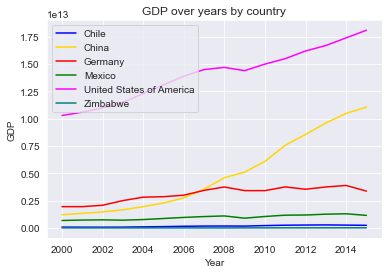

In [34]:
ax3 = plt.subplot(1, 1, 1)
countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']
colors = ['blue', 'gold', 'red', 'green', 'magenta', 'teal']
for i, j in zip (countries, colors):
    ax3.plot(data.Year[data.Country == i], data.GDP[data.Country == i], color=j, label=i)
ax3.legend(loc=2)
ax3.set_xlabel('Year')
ax3.set_ylabel('GDP')
ax3.set_title('GDP over years by country')
plt.show()

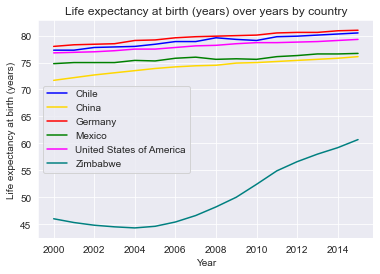

In [37]:
ax4 = plt.subplot(1, 1, 1)
countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']
colors = ['blue', 'gold', 'red', 'green', 'magenta', 'teal']
for i, j in zip (countries, colors):
    ax4.plot(data.Year[data.Country == i], data['Life expectancy at birth (years)'][data.Country == i], color=j, label=i)
ax4.legend()
ax4.set_xlabel('Year')
ax4.set_ylabel('Life expectancy at birth (years)')
ax4.set_title('Life expectancy at birth (years) over years by country')
plt.show()

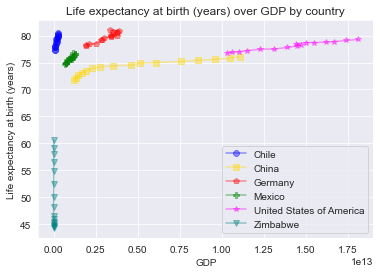

In [41]:
ax5 = plt.subplot(1, 1, 1)
countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']
colors = ['blue', 'gold', 'red', 'green', 'magenta', 'teal']
markers = ["8", "s", "p", "P", "*", "v"]
for i, j, k in zip (countries, colors, markers):
    ax5.plot(data.GDP[data.Country == i], data['Life expectancy at birth (years)'][data.Country == i], c=j, marker=k, label=j, alpha=0.4)
ax5.legend(countries)
ax5.set_xlabel('GDP')
ax5.set_ylabel('Life expectancy at birth (years)')
ax5.set_title('Life expectancy at birth (years) over GDP by country')
plt.show()

In [97]:
long_GDP = np.array(data.GDP)
percentage_growth = []
for i in range(len(long_GDP)):
    if i%16 == 0: 
        percentage_growth.append(0)
    else:
        percentage_growth.append(((long_GDP[i]-j)/j)*100)
    j = long_GDP[i]

In [100]:
data['Percentage_Growth_of_GDP_by_Year_by_Country'] = pd.Series(percentage_growth)

In [108]:
data.head()

,Country,Year,Life expectancy at birth (years),GDP,Percentage_Growth_of_GDP_by_Year_by_Country
0,Chile,2000,77.3,7.786093e+10,0.000000
1,Chile,2001,77.3,7.097992e+10,-8.837562
2,Chile,2002,77.8,6.973681e+10,-1.751358
3,Chile,2003,77.9,7.564346e+10,8.469915
4,Chile,2004,78.0,9.921039e+10,31.155282


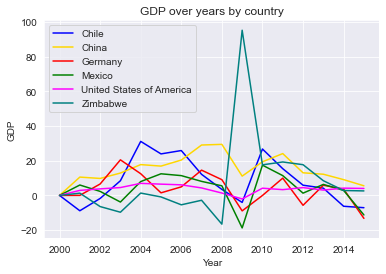

In [109]:
ax6 = plt.subplot(1, 1, 1)
countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']
colors = ['blue', 'gold', 'red', 'green', 'magenta', 'teal']
for i, j in zip (countries, colors):
    ax6.plot(data.Year[data.Country == i], data.Percentage_Growth_of_GDP_by_Year_by_Country[data.Country == i], color=j, label=i)
ax6.legend(loc=2)
ax6.set_xlabel('Year')
ax6.set_ylabel('GDP Percent Change')
ax6.set_title('GDP percent change over years by country')
plt.show()

In [110]:
long_life_expectancy = np.array(data['Life expectancy at birth (years)'])
percentage_growth_life = []
for i in range(len(long_life_expectancy)):
    if i%16 == 0: 
        percentage_growth_life.append(0)
    else:
        percentage_growth_life.append(((long_life_expectancy[i]-j)/j)*100)
    j = long_life_expectancy[i]
data['Percentage_Growth_of_GDP_by_Life_Expectancy_at_Birth_by_Country'] = pd.Series(percentage_growth_life)
data.head()

,Country,Year,Life expectancy at birth (years),GDP,Percentage_Growth_of_GDP_by_Year_by_Country,Percentage_Growth_of_GDP_by_Life_Expectancy_at_Birth_by_Country
0,Chile,2000,77.3,7.786093e+10,0.000000,0.000000
1,Chile,2001,77.3,7.097992e+10,-8.837562,0.000000
2,Chile,2002,77.8,6.973681e+10,-1.751358,0.646831
3,Chile,2003,77.9,7.564346e+10,8.469915,0.128535
4,Chile,2004,78.0,9.921039e+10,31.155282,0.128370


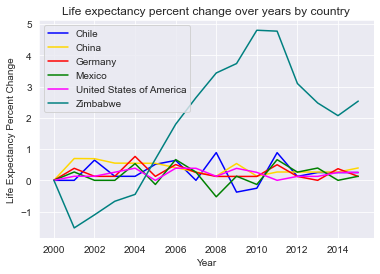

In [112]:
ax7 = plt.subplot(1, 1, 1)
countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']
colors = ['blue', 'gold', 'red', 'green', 'magenta', 'teal']
for i, j in zip (countries, colors):
    ax7.plot(data.Year[data.Country == i], data.Percentage_Growth_of_GDP_by_Life_Expectancy_at_Birth_by_Country[data.Country == i], color=j, label=i)
ax7.legend()
ax7.set_xlabel('Year')
ax7.set_ylabel('Life Expectancy Percent Change')
ax7.set_title('Life expectancy percent change over years by country')
plt.show()